In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [195]:
df = pd.read_csv("/Users/sreechandanakurella/Documents/Data Mining/Project-2/201707-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735599 entries, 0 to 1735598
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 198.6+ MB


In [197]:
df.shape

(1735599, 15)

In [198]:
df.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 228596
gender                          0
dtype: int64

In [199]:
df = df.dropna(axis=1, how='any')
df.shape

(1735599, 14)

In [200]:
df = df[df['tripduration'] <= 24*60*60*20]

In [201]:
x1 = len(df['start station id'].unique())
y1 = len(df[['start station id', 'start station name']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station name']].drop_duplicates())

x1 == y1 and x2 == y2


True

In [202]:
x1 = len(df['start station id'].unique())
y2 = len(df[['start station id', 'start station latitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station latitude']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [203]:
x1 = len(df['start station id'].unique())
y2 = len(df[['start station id', 'start station longitude']].drop_duplicates())
x2 = len(df['end station id'].unique())
y2 = len(df[['end station id', 'end station longitude']].drop_duplicates())

x1 == y1 and x2 == y2

True

In [204]:
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

In [205]:
df = df[df['start station id']!=3036]
df = df[df['end station id']!=3036]
df_loc = df_loc[df_loc['station id']!=3036]
df_loc.head()

,station id,station name,station latitude,station longitude
0,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241
1,293,Lafayette St & E 8 St,40.730207,-73.991026
2,3242,Schermerhorn St & Court St,40.691029,-73.991834
3,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198
5,361,Allen St & Hester St,40.716059,-73.991908


In [206]:
df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')
df['stoptime'] =pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735591 entries, 0 to 1735598
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         int64         
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           int64         
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  gender                   int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(3)
memory usage: 198.6+ MB


In [207]:
def gen_time_segment(dt):
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}-{}-{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

df['start_seg'] = [gen_time_segment(dt) for dt in df['starttime']]
df['stop_seg'] = [gen_time_segment(dt) for dt in df['stoptime']]

df[['start station id', 'starttime', 'start_seg', 'end station id', 'stoptime', 'stop_seg']].head()

,start station id,starttime,start_seg,end station id,stoptime,stop_seg
0,539,2017-07-01 00:00:00,2017-7-1 0:00,3107,2017-07-01 00:06:05,2017-7-1 0:00
1,293,2017-07-01 00:00:03,2017-7-1 0:00,3425,2017-07-01 00:35:46,2017-7-1 0:30
2,3242,2017-07-01 00:00:08,2017-7-1 0:00,3397,2017-07-01 00:05:37,2017-7-1 0:00
3,2002,2017-07-01 00:00:11,2017-7-1 0:00,398,2017-07-01 00:42:22,2017-7-1 0:30
4,2002,2017-07-01 00:00:15,2017-7-1 0:00,398,2017-07-01 00:42:29,2017-7-1 0:30


In [208]:
inflow = df[['end station id', 'stop_seg']] \
            .groupby(['end station id', 'stop_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'end station id':'station id','stop_seg':'time', 'counts':'in_flow_count'})

outflow = df[['start station id', 'start_seg']] \
            .groupby(['start station id', 'start_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'start station id':'station id','start_seg':'time', 'counts':'out_flow_count'})

In [209]:
station_id_list = list(df_loc['station id'])

# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2017-07-01 00:00:00", "2017-07-31 23:30:00", freq="30min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
df_flow = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
df_flow['time'] = pd.to_datetime(df_flow['time'], format='%Y-%m-%d %H:%M')
df_flow = df_flow.merge(template, on=["station id", "time"], how="right").fillna(0)
df_flow.head()

,station id,time,in_flow_count,out_flow_count
0,539,2017-07-01 00:00:00,1.0,1.0
1,539,2017-07-01 00:30:00,0.0,5.0
2,539,2017-07-01 01:00:00,0.0,0.0
3,539,2017-07-01 01:30:00,0.0,0.0
4,539,2017-07-01 02:00:00,1.0,3.0


In [210]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [211]:
from apyori import apriori

def apriori_find_association_rules(dataset, minsup, minconf):
    records = list(apriori(dataset, min_support=minsup, min_confidence=minconf))
    return records

def apriori_show_mining_results(records):
    ap = []
    for record in records:
        converted_record = record._replace(ordered_statistics=[x._asdict() for x in record.ordered_statistics])
        ap.append(converted_record._asdict())
    
    print("Frequent Itemsets:\n------------------")
    for ptn in ap:
        print('({})  support = {}'.format(", ".join(ptn["items"]), round(ptn["support"], 3)))
    print()
    print("Rules:\n------")
    for ptn in ap:
        for rule in ptn["ordered_statistics"]:
            head = rule["items_base"]
            tail = rule["items_add"]
            if len(head) == 0 or len(tail) == 0:
                continue
            confidence = rule["confidence"]
            print('({}) ==> ({})  confidence = {}'.format(', '.join(head), ', '.join(tail), round(confidence, 3)))
    print()

## Find Rules between in-flow and out-flow of Station 519

In [212]:
dat = df_flow[df_flow['station id'] == 519][['in_flow_count', 'out_flow_count']]
dat.head(5)

,in_flow_count,out_flow_count
255936,3.0,1.0
255937,1.0,1.0
255938,2.0,2.0
255939,1.0,2.0
255940,0.0,1.0


In [213]:
pd.isnull(dat).sum()

in_flow_count     0
out_flow_count    0
dtype: int64

In [214]:
print("Min: {}\nMax: {}".format(dat.values.min(), dat.values.max()))

Min: 0.0
Max: 116.0


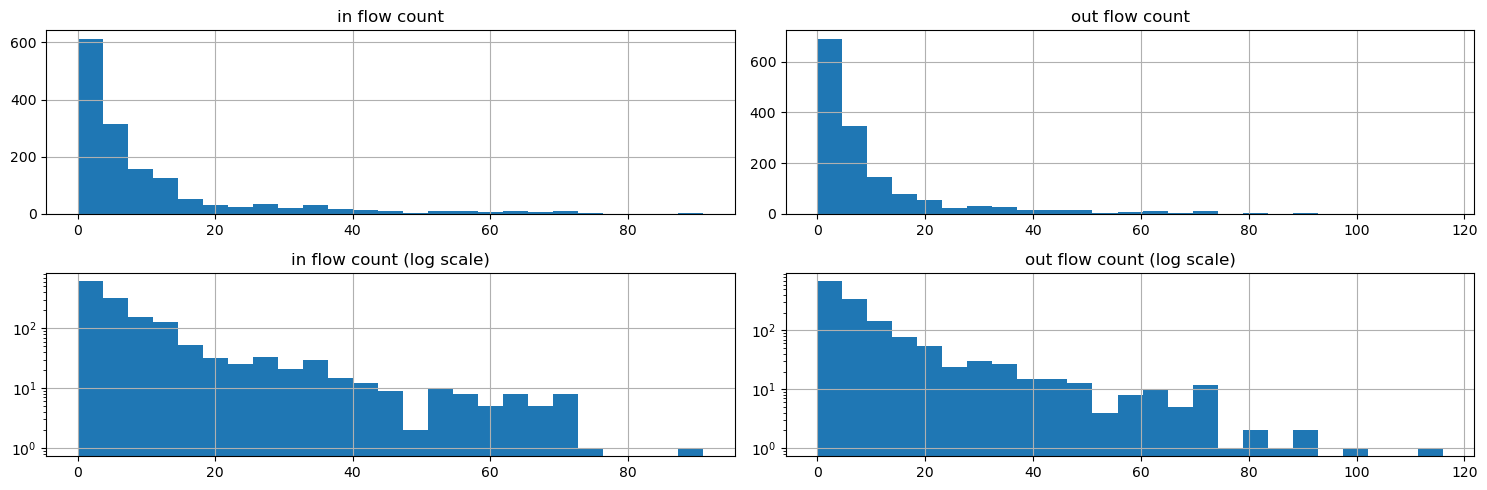

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

ax = plt.subplot(2, 2, 1)
dat['in_flow_count'].hist(bins=25)
ax.set_title("in flow count")

ax = plt.subplot(2, 2, 2)
dat['out_flow_count'].hist(bins=25)
ax.set_title("out flow count")

ax = plt.subplot(2, 2, 3)
ax.set_yscale('log')
dat['in_flow_count'].hist(bins=25)
ax.set_title("in flow count (log scale)")

ax = plt.subplot(2, 2, 4)
ax.set_yscale('log')
dat['out_flow_count'].hist(bins=25)
ax.set_title("out flow count (log scale)")

fig.tight_layout()

In [216]:
dat_1 = copy.deepcopy(dat)

In [217]:
dat_1['in_flow_count'] = pd.cut(dat_1['in_flow_count'], bins = 5, \
                                labels = ["in.level-1", "in.level-2", "in.level-3", \
                                          "in.level-4", "in.level-5"]).astype(str)
pd.cut(dat['in_flow_count'], bins = 5).value_counts()

(-0.091, 18.2]    1263
(18.2, 36.4]       141
(36.4, 54.6]        48
(54.6, 72.8]        34
(72.8, 91.0]         2
Name: in_flow_count, dtype: int64

In [218]:
dat_1['out_flow_count'] = pd.cut(dat_1['out_flow_count'], bins = 5, \
                                labels = ["out.level-1", "out.level-2", "out.level-3", \
                                          "out.level-4", "out.level-5"]).astype(str)
pd.cut(dat['out_flow_count'], bins = 5).value_counts()

(-0.116, 23.2]    1317
(23.2, 46.4]       111
(46.4, 69.6]        40
(69.6, 92.8]        18
(92.8, 116.0]        2
Name: out_flow_count, dtype: int64

In [219]:
dat_2 = copy.deepcopy(dat)

In [220]:
dat_2['in_flow_count'] = pd.qcut(dat_2['in_flow_count'], q = 5, \
                                labels = ["in.zero", "in.extreme-low", "in.low", \
                                          "in.medium", "in.high"]).astype(str)
pd.qcut(dat['in_flow_count'], q = 5).value_counts()

(-0.001, 1.0]    403
(3.0, 7.0]       315
(7.0, 14.0]      283
(14.0, 91.0]     278
(1.0, 3.0]       209
Name: in_flow_count, dtype: int64

In [221]:
dat_2['out_flow_count'] = pd.qcut(dat_2['out_flow_count'], q = 5, \
                                labels = ["out.zero", "out.extreme-low", "out.low", \
                                          "out.medium", "out.high"]).astype(str)
pd.qcut(dat['out_flow_count'], q = 5).value_counts()

(-0.001, 1.0]    423
(3.0, 7.0]       307
(7.0, 14.0]      292
(14.0, 116.0]    284
(1.0, 3.0]       182
Name: out_flow_count, dtype: int64

In [222]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_1.values.tolist(), 0.1, 0.2)

Apriori
********
CPU times: user 1.37 ms, sys: 298 µs, total: 1.67 ms
Wall time: 1.97 ms


In [223]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(in.level-1)  support = 0.849
(out.level-1)  support = 0.885
(out.level-1, in.level-1)  support = 0.847

Rules:
------
(in.level-1) ==> (out.level-1)  confidence = 0.998
(out.level-1) ==> (in.level-1)  confidence = 0.957



In [224]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_2.values.tolist(), 0.1, 0.2)

Apriori
********
CPU times: user 1.58 ms, sys: 150 µs, total: 1.73 ms
Wall time: 1.92 ms


In [225]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(in.low)  support = 0.212
(in.zero)  support = 0.271
(out.low)  support = 0.206
(out.zero)  support = 0.284
(out.high, in.high)  support = 0.164
(in.medium, out.medium)  support = 0.101
(out.zero, in.zero)  support = 0.222

Rules:
------
(in.high) ==> (out.high)  confidence = 0.878
(out.high) ==> (in.high)  confidence = 0.859
(in.medium) ==> (out.medium)  confidence = 0.53
(out.medium) ==> (in.medium)  confidence = 0.514
(in.zero) ==> (out.zero)  confidence = 0.821
(out.zero) ==> (in.zero)  confidence = 0.783



## Find Rules between Time of a Day and Flows of station 519

In [226]:
dat = df_flow[df_flow['station id'] == 519][['time', 'in_flow_count', 'out_flow_count']]
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']
dat['time'] = ["{:02d}:{:02d}".format(dt.hour, dt.minute) for dt in dat['time']]
dat = dat[['time', 'flow_count']]
dat.head(5)

,time,flow_count
255936,00:00,4.0
255937,00:30,2.0
255938,01:00,4.0
255939,01:30,3.0
255940,02:00,1.0


In [227]:
dat_1 = copy.deepcopy(dat)

In [228]:
dat_1['time'] = ["{:02d}:00~{:02d}:00".format(math.floor(int(dt.split('~')[0].split(':')[0])/2)*2, math.floor(int(dt.split('~')[0].split(':')[0])/2)*2+2) for dt in dat_1['time']]
dat_1['time'] = dat_1['time'].astype(str)

In [229]:
dat_1['flow_count'] = pd.qcut(dat_1['flow_count'], q = 3, \
                                labels = ["low", "medium", "high"]).astype(str)

pd.qcut(dat['flow_count'], q = 3).value_counts()

(-0.001, 5.0]    521
(17.0, 185.0]    486
(5.0, 17.0]      481
Name: flow_count, dtype: int64

In [230]:
dat_2 = copy.deepcopy(dat)

In [231]:
mapping = ["Night"] * 6 + ["Morning"] * 5 + ["Noon"] * 2 + ["Afternoon"] * 3 + ["Evening"] * 6 + ["Night"] * 2

# Filter out rows with invalid time data
dat_2 = dat_2[dat_2['time'].str.match(r'^\d{2}:\d{2}$')]

dat_2['time'] = [mapping[math.floor(datetime.strptime(dt, '%H:%M').hour)] for dt in dat_2['time']]

In [232]:
dat_2['flow_count'] = pd.qcut(dat_2['flow_count'], q = 3, \
                                labels = ["low", "medium", "high"]).astype(str)

pd.qcut(dat['flow_count'], q = 3).value_counts()

(-0.001, 5.0]    521
(17.0, 185.0]    486
(5.0, 17.0]      481
Name: flow_count, dtype: int64

In [233]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_1.values.tolist(), 0.05, 0.6)

Apriori
********
CPU times: user 1.71 ms, sys: 313 µs, total: 2.02 ms
Wall time: 1.77 ms


In [234]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(low, 00:00~02:00)  support = 0.075
(02:00~04:00, low)  support = 0.083
(04:00~06:00, low)  support = 0.071
(high, 08:00~10:00)  support = 0.053
(medium, 12:00~14:00)  support = 0.055
(16:00~18:00, high)  support = 0.065
(18:00~20:00, high)  support = 0.054

Rules:
------
(00:00~02:00) ==> (low)  confidence = 0.903
(02:00~04:00) ==> (low)  confidence = 0.992
(04:00~06:00) ==> (low)  confidence = 0.855
(08:00~10:00) ==> (high)  confidence = 0.637
(12:00~14:00) ==> (medium)  confidence = 0.661
(16:00~18:00) ==> (high)  confidence = 0.774
(18:00~20:00) ==> (high)  confidence = 0.645



In [235]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_2.values.tolist(), 0.05, 0.6)

Apriori
********
CPU times: user 1.9 ms, sys: 81 µs, total: 1.98 ms
Wall time: 2.17 ms


In [236]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(Night, low)  support = 0.279
(Noon, medium)  support = 0.052

Rules:
------
(Night) ==> (low)  confidence = 0.837
(low) ==> (Night)  confidence = 0.797
(Noon) ==> (medium)  confidence = 0.621



## Find Rules between Station Locations and Their Daily Flows

In [237]:
dat = pd.merge(df_flow, df_loc, on=['station id'], how='left')
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']
dat['day'] = [dt.day for dt in dat['time']]
dat = dat.groupby(['station latitude', 'station longitude', "day"], as_index=False) \
            .agg({'flow_count': 'sum'})
dat = dat[['station latitude', 'station longitude', 'flow_count']]
dat.head(5)

,station latitude,station longitude,flow_count
0,40.6554,-74.010628,0.0
1,40.6554,-74.010628,0.0
2,40.6554,-74.010628,0.0
3,40.6554,-74.010628,0.0
4,40.6554,-74.010628,0.0


In [238]:
pd.cut(dat['station latitude'], bins = 5).value_counts()

(40.715, 40.745]    5425
(40.685, 40.715]    4805
(40.745, 40.774]    3968
(40.655, 40.685]    2945
(40.774, 40.804]    2480
Name: station latitude, dtype: int64

In [239]:
pd.cut(dat['station longitude'], bins = 5).value_counts()

(-74.012, -73.985]    7626
(-73.985, -73.957]    7347
(-73.957, -73.93]     3875
(-74.04, -74.012]      651
(-74.067, -74.04]      124
Name: station longitude, dtype: int64

In [240]:
dat_1 = copy.deepcopy(dat)

In [241]:
dat_1['station latitude'] = pd.cut(dat_1['station latitude'], bins = 5).astype(str)
dat_1['station latitude'] = "latitude = " + dat_1['station latitude']
dat_1['station longitude'] = pd.cut(dat_1['station longitude'], bins = 5).astype(str)
dat_1['station longitude'] = "longitude = "+ dat_1['station longitude'] 

In [242]:
dat_1['flow_count'] = pd.qcut(dat_1['flow_count'], q = 5, \
                             labels = ["extreme-low", "low", "medium", "high", "extreme-high"]).astype(str)
pd.qcut(dat['flow_count'], q = 5).value_counts()

(-0.001, 51.0]     3943
(51.0, 96.0]       3939
(163.0, 286.0]     3923
(286.0, 1532.0]    3919
(96.0, 163.0]      3899
Name: flow_count, dtype: int64

In [243]:
pd.qcut(dat['station latitude'], q = 5).value_counts()

(40.654, 40.691]    3937
(40.691, 40.715]    3937
(40.735, 40.762]    3937
(40.715, 40.735]    3906
(40.762, 40.804]    3906
Name: station latitude, dtype: int64

In [244]:
pd.qcut(dat['station longitude'], q = 5).value_counts()

(-74.068, -73.998]    3937
(-73.998, -73.987]    3937
(-73.976, -73.957]    3937
(-73.987, -73.976]    3906
(-73.957, -73.93]     3906
Name: station longitude, dtype: int64

In [245]:
dat_2 = copy.deepcopy(dat)

In [246]:
dat_2['station latitude'] = pd.qcut(dat_2['station latitude'], q = 5).astype(str)
dat_2['station latitude'] = "latitude = " + dat_2['station latitude']
dat_2['station longitude'] = pd.qcut(dat_2['station longitude'], q = 5).astype(str)
dat_2['station longitude'] = "longitude = "+ dat_2['station longitude'] 

In [247]:
dat_2['flow_count'] = pd.qcut(dat_2['flow_count'], q = 5, \
                             labels = ["extreme-low", "low", "medium", "high", "extreme-high"]).astype(str)
pd.qcut(dat['flow_count'], q = 5).value_counts()

(-0.001, 51.0]     3943
(51.0, 96.0]       3939
(163.0, 286.0]     3923
(286.0, 1532.0]    3919
(96.0, 163.0]      3899
Name: flow_count, dtype: int64

In [248]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_1.values.tolist(), 0.08, 0.4)

Apriori
********
CPU times: user 22.2 ms, sys: 1.49 ms, total: 23.7 ms
Wall time: 23 ms


In [249]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(latitude = (40.715, 40.745], extreme-high)  support = 0.106
(longitude = (-74.012, -73.985], extreme-high)  support = 0.128
(longitude = (-74.012, -73.985], high)  support = 0.105
(longitude = (-74.012, -73.985], latitude = (40.715, 40.745])  support = 0.142
(longitude = (-73.985, -73.957], latitude = (40.745, 40.774])  support = 0.1
(low, longitude = (-73.985, -73.957])  support = 0.094
(medium, longitude = (-73.985, -73.957])  support = 0.097

Rules:
------
(extreme-high) ==> (latitude = (40.715, 40.745])  confidence = 0.529
(extreme-high) ==> (longitude = (-74.012, -73.985])  confidence = 0.64
(high) ==> (longitude = (-74.012, -73.985])  confidence = 0.526
(latitude = (40.715, 40.745]) ==> (longitude = (-74.012, -73.985])  confidence = 0.514
(latitude = (40.745, 40.774]) ==> (longitude = (-73.985, -73.957])  confidence = 0.492
(low) ==> (longitude = (-73.985, -73.957])  confidence = 0.469
(medium) ==> (longitude = (-73.985, -73.957])  confidenc

In [250]:
%%time
print("Apriori\n********")
ap = apriori_find_association_rules(dat_2.values.tolist(), 0.08, 0.4)

Apriori
********
CPU times: user 23.4 ms, sys: 1.26 ms, total: 24.7 ms
Wall time: 24.1 ms


In [251]:
apriori_show_mining_results(ap)

Frequent Itemsets:
------------------
(extreme-high, latitude = (40.735, 40.762])  support = 0.09
(extreme-low, latitude = (40.654, 40.691])  support = 0.081

Rules:
------
(extreme-high) ==> (latitude = (40.735, 40.762])  confidence = 0.451
(latitude = (40.735, 40.762]) ==> (extreme-high)  confidence = 0.449
(extreme-low) ==> (latitude = (40.654, 40.691])  confidence = 0.403
(latitude = (40.654, 40.691]) ==> (extreme-low)  confidence = 0.404

